## Solving $x=\tan x$ with Newton-Raphson

The Newton-Raphson algorithm finds a root of a function $f(x)$ by starting with an initial guess for the solution, $x_0$, and applying the iterative formula: $x_{n+1} = x_n - \frac{f(x_n)}{f^{\prime}(x_n)}$.

I shall refer to the fraction $\frac{f(x_n)}{f^{\prime}(x_n)}$ as *correction factor* as it is used to correct the current guess for the root to arrive at a (hopefully) better one. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')
%matplotlib qt5

In this notebook we work with both numeric and symbolical math. For symbolic math we need symbolic Python: `sympy`.

If the following box does not work on your computer, `sympy` is not included in your Python installation. With anaconda, `sympy` can be installed by typing
```
conda install sympy
```

In [2]:
from sympy import *
init_printing(use_latex=True)
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
#from sympy import init_session
#init_session()
#init_printing?

Using both numeric and symbolic math in the same notebook is **dangerous** because numbers and symbolic variables are totally different objects, and assigning one to the other **will** lead to unintended consequences.

Hence, I use the following convention:
* Numeric variables will be small-caps: `x`, `y`, `t`, ...
* Symbolic variables will be capitalized: `X`, `Y`, `T`, ...

So `x` and `X` will represent the same variable, but `x` is used for numeric math, and `X` is used for symbolc math.

In [4]:
# define symbols for two real numbers
X = symbols('X', real=True)

We wish to solve $x=\tan x$ or, expressed for root finding, $x - \tan x = 0$.

So the function we set to zero is $f(x) = x - \tan x$.

To apply the Newton-Raphson algorithm, we need
* The correction factor $f(x)/f'(x)$.
* An initial guess for the position of the root, $x_0$.

Let's start with the correction factor.

In [5]:
F = X - tan(X)
F

In [7]:
FP = diff(F, X)
FP

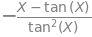

In [ ]:
C = F/FP
C

If we now evalute the correction factor for $X=1$, we get a symbolic expression. 

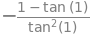

In [15]:
C.subs(X,1)

That is great, but not what we need. For the Newton-Raphson iteraton we need the actual number. To get that we use the `sympy` function `lambdify`, which turns a symbolic function into a numeric one. The argument `"numpy"` lets `sympy` know which numeric Python library to use for functions such as sin, exp, of ln.

In [18]:
f = lambdify(X, F, "numpy")
c = lambdify(X, C, "numpy")
c

<function _lambdifygenerated(X)>

Now we get the numerical value we want.

In [19]:
print(f(1), c(1))

-0.5574077246549023 0.22980968849693878


### Start value

Always, always, always start with a plot and get a guess with the mouse.

In [21]:
xmin=-5
xmax=5
x_pts = np.linspace(xmin, xmax, 200)
y_pts = f(x_pts)
plt.cla()
plt.plot(x_pts, y_pts, 'o')
plt.ylim(-5,5)
plt.show()

This surely looks confusing. 

Obviously this function has many zeros as each branch of $\tan x$ crosses the line $x$ once. 

Worse, if we plot with connected lines the plot would show artifical zeros wherever $\tan x$ jumps from $-\infty$ to $\infty$.

Okay, so we have to make a decision. Let's compute the zero at about 4.3.

The following loop implements the Newton-Raphson algorithm. It performs at most 10 steps, but stops if convergence has been reached.

In [30]:
threshold = 1e-8
max_steps = 10
x_old = 4.3
print(f'{x_old:13.10f}')

for i in range(max_steps):
    x_new = x_old - c(x_old)
    change = abs(x_new-x_old)
    print(f'{x_new:13.10f}   {change:13.10f}')
    if change < threshold:
        break
    x_old = x_new

if change < threshold:
    print(f'Converged to {threshold:.2e}')
else:
    print('No convergence.')

 4.3000000000
 4.6854762440    0.3854762440
 4.6619523164    0.0235239277
 4.6233523226    0.0385999937
 4.5709259629    0.0524263598
 4.5212184117    0.0497075511
 4.4970284791    0.0241899326
 4.4934711586    0.0035573205
 4.4934094759    0.0000616827
 4.4934094579    0.0000000180
 4.4934094579    0.0000000000
Converged to 1.00e-08


## Task

* Modify this notebook to solve the problems given in the handout.

* This notebook contains plenty of explanation and try-it-out cells. Make a copy, rename it, delete unnecessary clutter, and create your own Newton-Raphson notebook.